# Principal Component Analysis (PCA)

## Brief primer and history
<p style = 'text-align:justify'>Principal Component Analysis (PCA) was invented in 1901 by <a href = 'https://en.wikipedia.org/wiki/Karl_Pearson'>Karl Pearson</a> as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by <a href = 'https://en.wikipedia.org/wiki/Harold_Hotelling'>Harold Hotelling</a> in the 1930s.Principal component analysis (PCA) is a statistical procedure that uses an <a href = 'https://en.wikipedia.org/wiki/Orthogonal_transformation'>orthogonal transformation</a> to convert a set of observations of possibly correlated variables into a set of values of <a href = 'https://en.wikipedia.org/wiki/Correlation_and_dependence'>linearly uncorrelated</a> variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible <a href = 'https://en.wikipedia.org/wiki/Variance'>variance</a> (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is <a href = 'https://en.wikipedia.org/wiki/Orthogonal'>orthogonal</a> the preceding components. The resulting vectors are an uncorrelated <a href = 'https://en.wikipedia.org/wiki/Orthogonal_basis_set'>orthogonal basis set</a>. PCA is also very useful in visualizing samples with exorbitant amount of features, for example a dataset that contain samples of rocks (i.e basalt, granite, andesite, diorite) with 37 features, it would be extremely difficult to visualize each sample on a single plot. PCA comes in handy in achieving this purpose.</p> 

PCA is sensitive to the relative scaling of the original variables.


### How does Dimension reduction work? and What are the consequence?

<img src = 'camera.jpg'>

<p style = 'text-align:justify'>I would like to explain the concept of how dimension reduction works using the camera as an analogy, when the camera takes a picture, the scene it tries to cover is a 3D scene, once it takes the picture, it reduces the dimension to a 2D picture by eliminating the depth, but even with this perceived elimination, the picture still has a very significant semblance with the real life scene that was shot. This perfectly explains the concept of dimension reduction. Though some information is surely lost in the process, but it is deemed irrelevant to the information PCA sets to capture.</p>

### How is the Variance calculated in PCA?

<p style = 'text-align:justify'>Two of the most important statistical term PCA uses is <b>Variance</b> and <b>Error</b>. Lets say we have a dataset that contains 4 samples of concrete and it has features/dimensions such as Weight and Area, PCA plots each concrete on a graph with the features as the axis, then does the following, the PCA fits a line that minimizes the distance of the data point to the line, PCA operates in terms of Variance and error like we said earlier, it tries to maximize the variance as much as possible so that the error is minimized to the best of it's capacity. When variance is maximized, the error is minimized; when the variance is minimized, the error is maximized — in our context, they are, in essence, two opposing faces along the same coin. In the context of PCA, this idea is relevant to understanding how maximizing the variance minimizes the information lost (e.g. again, depth).</p>

Looking at the diagram below, the graph shows one of the conrete sample, with the weight and area of the sample as the $x$ and $y$ axis respectively. the PCA fit a line on the graph that passes through the origin

<img src = 'PCA.png'>

$$a^2 = b^2 + c^2$$

$a$ is the distance of the sample point to the origin

$b$ is the distance of the sample point to the PCA line

$c$ is the distance from the origin to the point where the perpendicular line from the sample point meets the fitted PCA line

since a would always be constant, it is determined by b and c, so if b is maximized, c would be minimized as vice versa, b is the error while c is the variance, so the PCA line simple fits a line where the sum of c for all the data points is maximum, this in turn reduces the error.

## Mathematical details
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.[3]

the following steps are followed for dimensionality reduction using Principal Components

#### 1)  Standardize and Normalize our dataset:
Let’s say our data is arranged in some matrix X as shown below, where there are rows representing 4-samples of the concrete each of which consist of n-variables (or n-dimensions in accordance with our previous explanations) as represented below.

$$X = \begin{bmatrix} x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n} \\  x_{2,1} & x_{2,2} &x_{2,3}& \cdots & x_{2,n}\\ x_{3,1} & x_{3,2} &x_{3,3}& \cdots & x_{3,n}\\ \vdots & \vdots&\vdots&\ddots  &\vdots\\ x_{p,1} & x_{p,2}&x_{p,3}&\cdots &x_{p,n}\end{bmatrix}$$

it is very important to center our data while performing PCA, this is done by calculating the mean of each dimension of our dataset and then subtracting from the values in each row:

$$\begin{array}{rcl}
\text{mean of column j: }\bar{x}_{j} = \frac{1}{p} \sum_{i=1}^{p} x_{i,j}\\ \\ 
\text{mean matrix: } \bar{X} = \begin{bmatrix} \bar{x}_{1} & \bar{x}_{2} & \cdots & \bar{x}_{n} \\  \bar{x}_{1} & \bar{x}_{2} & \cdots & \bar{x}_{n}\\ \bar{x}_{1} & \bar{x}_{2} & \cdots & \bar{x}_{n}\\ \vdots & \vdots&\ddots  &\vdots\\ \bar{x}_{1} & \bar{x}_{2}&\cdots &\bar{x}_{n}\end{bmatrix} \\ \\ 
\text{mean-centered matrix: } M = X - \bar{X}
\end{array}$$

So the process above automatically centres our data, but if we observe closely, it is possibe that the features of our dataset are intensely discrete in term of values, for example the weight of the concrete sample could range from (12,000 - 15,000kg) while the Area can range from (100-150 m^2). This shows the deviation in the ranges of the two features, if the dataset is kept that way, the weight would overinfluence our calcualtion relative to the Area. Therefore, to avoid this problem we would need to standardize our dataset by divide each value by the standard deviation of it's respective column.

#### 2) Calculate the covariance matrix
The next step of our process is to calculate the empirical covariance matrix of our data. This is done through simple linear algebra.


\begin{array}{rcl}
\text{sample covariance matrix if mean is known: } C = \frac{1}{p}M^{\mathsf{T}}M \\
\text{sample covariance matrix if mean is unknown: } C = \frac{1}{p-1}M^{\mathsf{T}}M \\ \\
\text{where } M^{\mathsf{T}}M =
\begin{bmatrix} m_{1,1} & m_{2,1} & \cdots & m_{p,1} \\  m_{1,2} & m_{2,2} & \cdots & m_{p,2}\\ m_{1,3} & m_{2,3} & \cdots & m_{p,3}\\ \vdots & \vdots&\ddots  &\vdots\\ m_{1,n} & m_{2,n}&\cdots &m_{p,n}\end{bmatrix}
\begin{bmatrix} m_{1,1} & m_{1,2} & \cdots & m_{1,n} \\  m_{2,1} & m_{2,2} & \cdots & m_{2,n}\\ m_{3,1} & m_{3,2} & \cdots & m_{3,n}\\ \vdots & \vdots&\ddots  &\vdots\\ m_{p,1} & m_{p,2}&\cdots &m_{p,n}\end{bmatrix}\\ \\
\text{ where for each m we have that:   } m_{i,j} = x_{i,j} - \bar{x}_{j}
\end{array}

Considering the property Cov(X, X) = Var(X), and by the statistical definition `Cov(X, Y) = E[(X - E[X])(Y - E[Y])]`, our n by n covariance matrix above can be rewritten in terms of the variance-covariance matrix:

\begin{array}{rcl}
Var(M) =
\begin{bmatrix} Var(M_{1}) & Cov(M_{2},M_{1}) & Cov(M_{3},M_{1}) & \cdots & Cov(M_{n},M_{1}) \\  Cov(M_{1},M_{2}) & Var(M_{2}) & Cov(M_{3},M_{2}) & \cdots & Cov(M_{n},M_{2})\\ Cov(M_{1},M_{3}) & Cov(M_{2},M_{3}) & Var(M_{3}) & \cdots & Cov(M_{n},M_{3})\\ \vdots & \vdots&\ddots  &\vdots\\ Cov(M_{1},M_{n}) & Cov(M_{2},M_{n}) & Cov(M_{3},M_{n}) &\cdots &Var(M_{n})\end{bmatrix} \\ \\
\text{where } M_{i} \text{ here represents the i-th column vector of matrix } M \text{, i.e. for }i=1, ..,n\\ 
M= \begin{bmatrix} M_{1} & M_{2} & M_{3} & \cdots & M_{n}\end{bmatrix} 
\text{ and where } M_{i} = \begin{bmatrix} m_{1,i} & m_{2,i} & m_{3,i} & \cdots & m_{p,i} \end{bmatrix}^{\mathsf{T}} \\
\end{array}

The other important covariance property that must be noted is the fact that Cov(X, Y) = Cov(Y, X) are interchangeable. This means that the upper and lower triangular entries of our Var(M) — entries over and under the diagonal containing the Var(Mj)’s — matrix are equal, and so it is a symmetric matrix (this means that A’=A).

#### 3) Eigen Decomposition

<p style = 'text-align'>Now that our $n$ X $n$ matrix is square and symmetric, we would diagonalize it with real eigenvalues and orthogonal (i.e. perpendicular) eigenvectors. This process is called eigendecomposition or spectral decomposition. The eigenvectors serve as the principal component, so if you think of them as the axes or orientation of the transformation, the eigenvalues can be looked at as the measure of the distortion of the transformation. the eigen value (λ) can be seen as a multiple of the eigen vector (v) And so now, all we have left is a linear algebra problem. For the sake of simplifying our notation, let us refer to our matrix Var(M) as A. Then for our square symmetric matrix A, eigenvalue λ and eigenvector v:</p>

\begin{array}{rcl}
Av=\lambda \overrightarrow{v} \Longrightarrow A\overrightarrow{v}-\lambda \overrightarrow{v}=0 \Longrightarrow (A-\lambda I)\overrightarrow{v}=0 
\end{array}

However, since our eigenvector v is non-zero, then we have that:

\begin{array}{rcl}
det(A-\lambda I)=0 \Longrightarrow \begin{vmatrix} Var(M_{1})-\lambda_{1} & Cov(M_{1},M_{2}) & Cov(M_{1},M_{3}) & \cdots & Cov(M_{1},M_{n}) \\  Cov(M_{2},M_{1}) & Var(M_{2})-\lambda_{2} & Cov(M_{2},M_{3}) & \cdots & Cov(M_{2},M_{n})\\ Cov(M_{3},M_{1}) & Cov(M_{3},M_{2}) & Var(M_{3}) -\lambda_{3}& \cdots & Cov(M_{3},M_{n})\\ \vdots & \vdots& \vdots & \ddots  &\vdots\\ Cov(M_{n},M_{1}) & Cov(M_{n},M_{2}) & Cov(M_{n},M_{3}) &\cdots &Var(M_{n})-\lambda_{n}\end{vmatrix} = 0
\end{array}


And using our linear algebra skills we should be able to eventually solve for all n-eigenvalues. Assuming we have all $n$-eigenvalues, we will be able to go back to our initial equation (A - λI)v=0, and plug in our eigenvalues one at a time to get each of corresponding eigenvector:

\begin{array}{}
\text{Solve the equation below for every } \lambda_{i} \text{ (so }n\text{-times) to get all eigenvectors }\overrightarrow{v_{1}},..,\overrightarrow{v_{n}}\\ \\
(A-\lambda_{i} I)\overrightarrow{v_{i}}=0 \Longrightarrow \begin{bmatrix} Var(M_{1})-\lambda_{i} & Cov(M_{1},M_{2}) & Cov(M_{1},M_{3}) & \cdots & Cov(M_{1},M_{n}) \\  Cov(M_{2},M_{1}) & Var(M_{2})-\lambda_{i} & Cov(M_{2},M_{3}) & \cdots & Cov(M_{2},M_{n})\\ Cov(M_{3},M_{1}) & Cov(M_{3},M_{2}) & Var(M_{3}) -\lambda_{i}& \cdots & Cov(M_{3},M_{n})\\ \vdots & \vdots& \vdots & \ddots  &\vdots\\ Cov(M_{n},M_{1}) & Cov(M_{n},M_{2}) & Cov(M_{n},M_{3}) &\cdots &Var(M_{n})-\lambda_{i}\end{bmatrix} 
\begin{bmatrix} v_{1} \\v_{2} \\v_{3} \\\vdots \\v_{n} \end{bmatrix}
  = 0
\end{array}

after obtaining our eigen vector, it is important to note that the length of the vector has to be 1, so we have to divide all eigen vectors with the length of the vector
then the features are transformed using The general formula, for data of dimension k: `[normalized data]*[first k principal components] = [k-dimension transformed data]`. Now we can move on and see what this may look like in practice.


We would be using a wine datasets that consist of samples of wine in different classes, with features such as `Alcohol`, `Malic Acid`, `Ash`, `Alcalinity of ash`, `Magnesium`, `Flavanoids`, `Color intensity` e.t.c. We would carry out PCA to visualize the classes of the data and see the clusters of each class of the wine to see how closely related they are and also which features are more important to each class of wine.


## Import Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Dataset for Exploratory Analysis

In [3]:
wine = pd.read_csv('wine.data.csv')
wine.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
wine.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

### Basic Statistics

In [5]:
wine.iloc[:,1:].describe().apply(lambda s:s.apply(lambda x: format(x,'.2f')))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


### Visualizing the each Class based on each features using a Boxplot

The describe function above gives a perfect picture of the joint statistical description of all the classes,but in these part we would use the boxplot to examine the distribution of each of each class based on each given feature in the dataset as shown below: 

C:\Users\Hp\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\Anacondaa\lib\site-

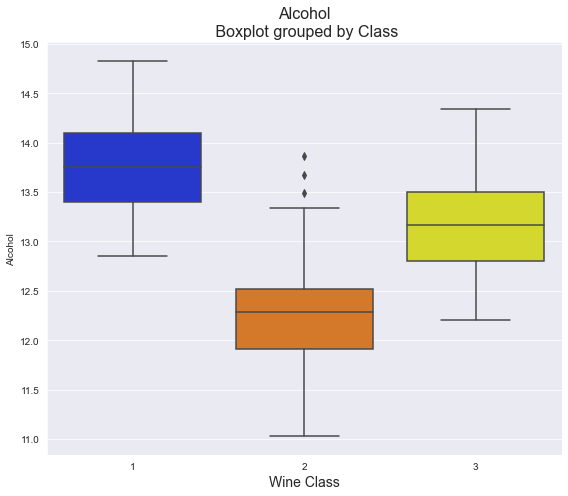

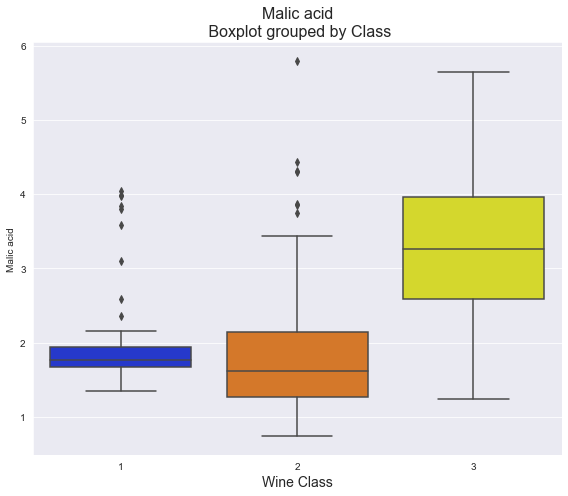

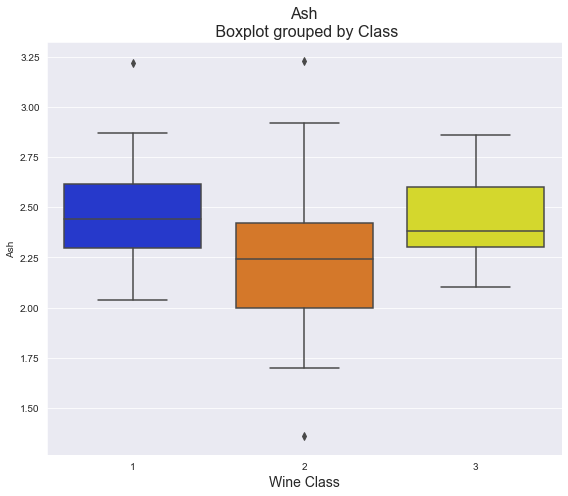

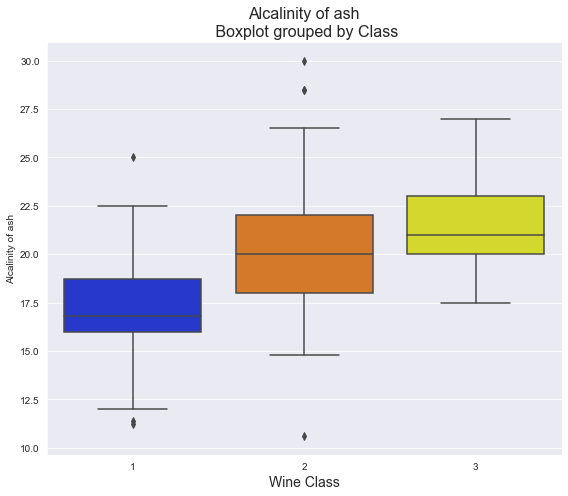

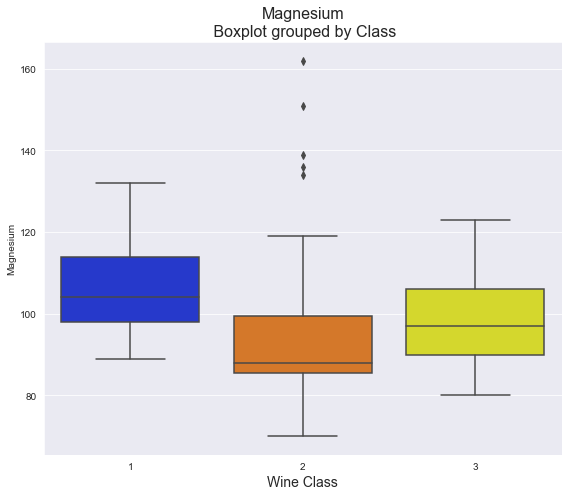

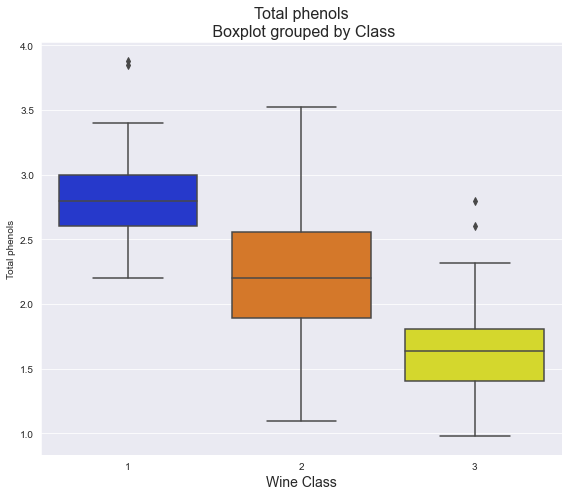

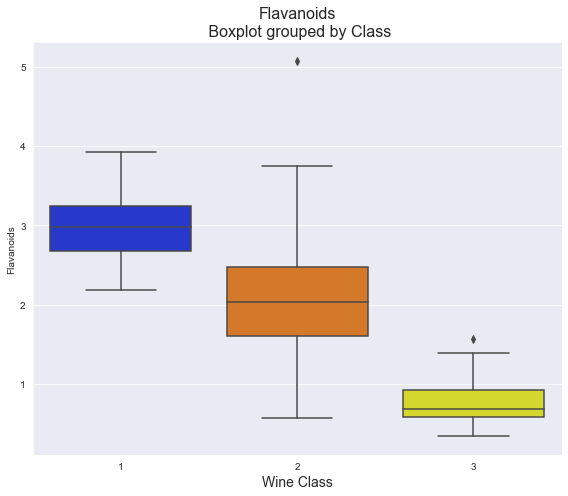

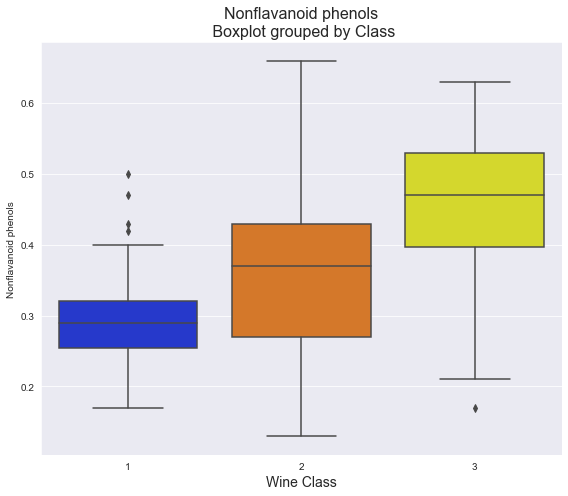

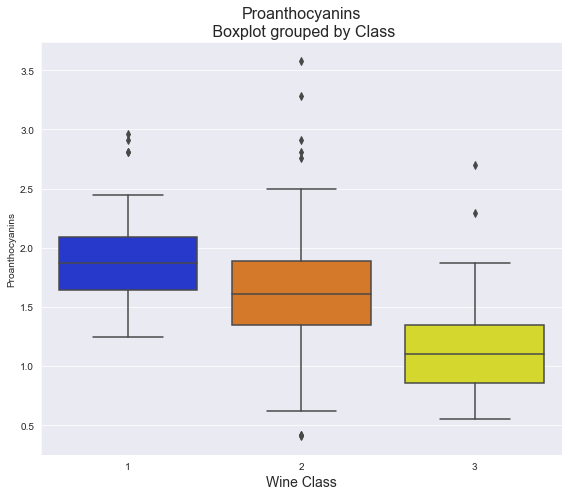

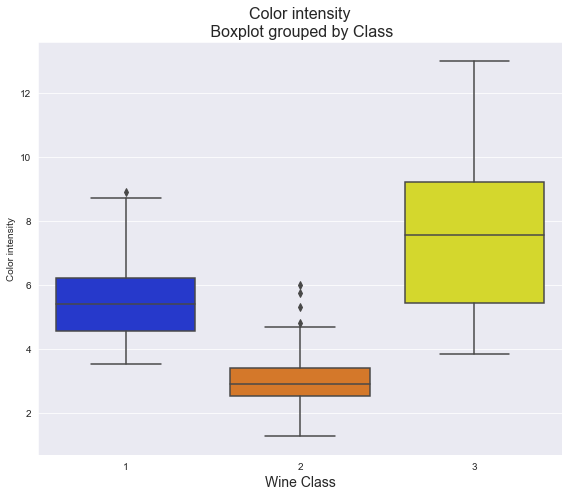

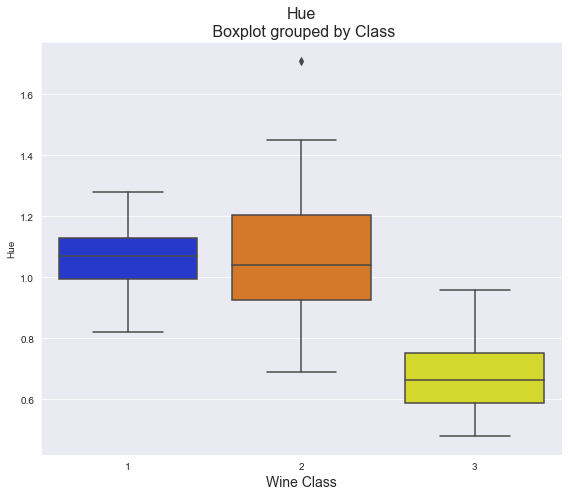

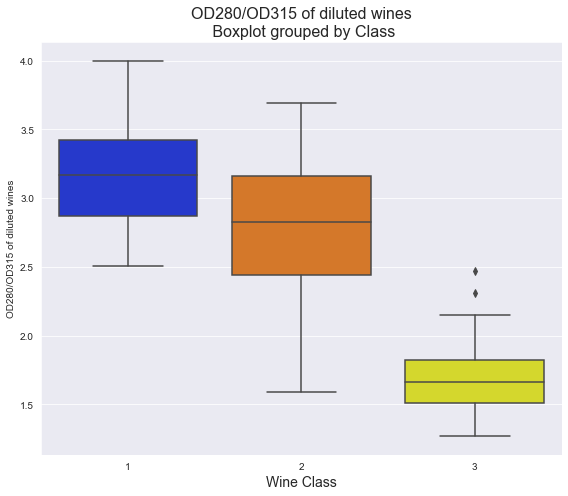

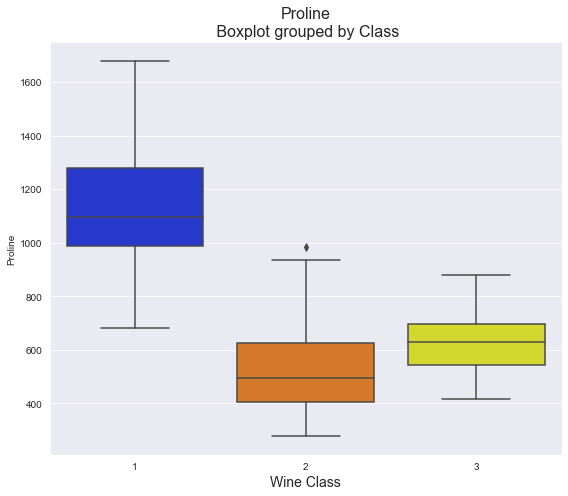

In [6]:
color = ['#0A24E7','#F1750D','#F0F311','#151514']
for c in wine.columns[1:]:
    plt.figure(figsize = (8,7), tight_layout=True)
    sns.set_style('darkgrid')
    sns.boxplot(wine['Class'], wine[f'{c}'], palette = color[:3])
    plt.title("{}\n Boxplot grouped by Class".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=14)
    

It can be seen that some features classify the wine labels pretty clearly. For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.it also shows the discreteness in each class.

## Visualising Class Seperation

Below is an example of class seperation using two variables

No handles with labels found to put in legend.


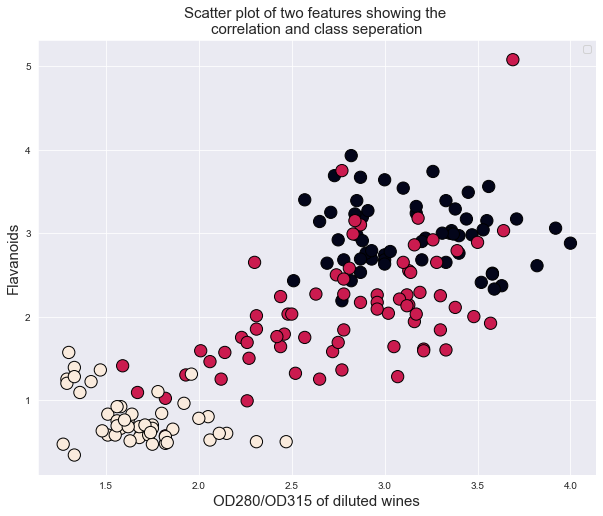

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(wine['OD280/OD315 of diluted wines'],wine['Flavanoids'],c=wine['Class'],edgecolors='k',alpha=1,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.legend()
plt.show()

## Collinearity of Features
Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance

<ipython-input-8-2b5c62ed5271>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=12)
<ipython-input-8-2b5c62ed5271>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=12)


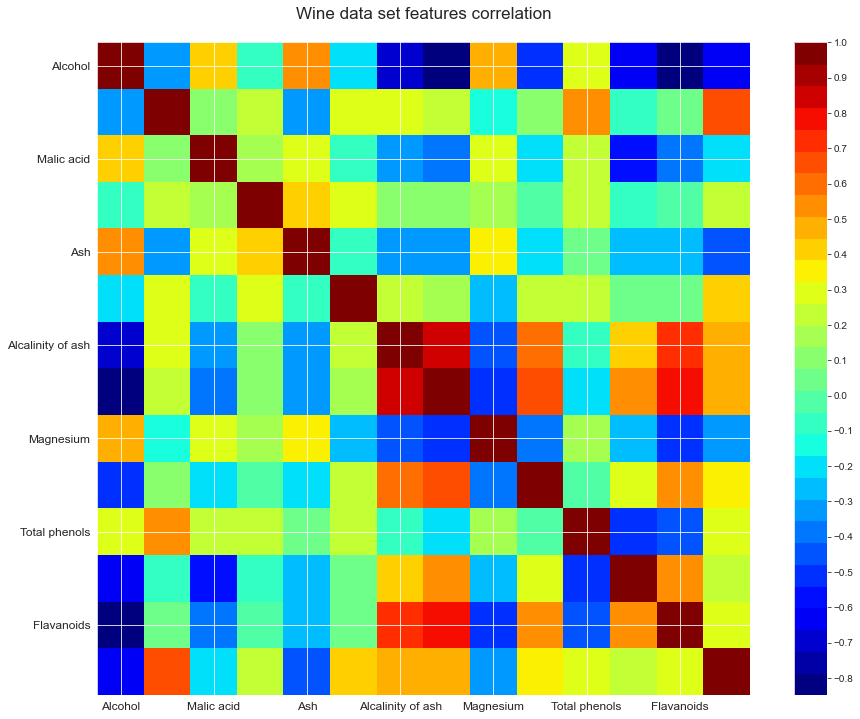

In [8]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(wine.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=17)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-14,11)])
    plt.show()

correlation_matrix(wine)

### Principal Component Analysis

### Data Scaling & Normalizing

PCA requires that we scale and normalize our dataset, we would be using the standardscaler from the sklearn library to perform this, we are going to do that below:

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std = StandardScaler()

This process should be carried out only on the predictor variable, as a result of this we would have to seperate our predictor variables from our target variable as shown below.

In [11]:
X = wine.drop('Class',axis = 1)
Y = wine[['Class']]

In [12]:
Y['Class'] = Y['Class'].astype('object')

<ipython-input-12-49d703262115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Class'] = Y['Class'].astype('object')


In [13]:
Y.dtypes

Class    object
dtype: object

In [14]:
X = std.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
X = pd.DataFrame(data=X,columns=wine.columns[1:])
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


So now we have successfully normalized our dataset as shown above, lets check out some descriptive statistics about the dataset

In [16]:
X.describe().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


studying the description table, it is noticeable that the mean of all our features is now zero, and the maximum and minimum value of each feature are in the same range, which means that the range of each feature would be close to each other.

Now it is time to go into the PCA process proper.

## PCA Class Import and Analysis

We would import the PCA sub module from the decomposition module in sklearn 

In [17]:
from sklearn.decomposition import PCA

Next we assign it to a variable and select our preferable number of components, for this exercise we would not assign a number to the number of component attributes.

In [18]:
pca = PCA(n_components=None)

Then we fit a function to the normalized dataset, this where the PCA fits a line to the dataset that maximizes the variance and minimizes the error.

In [19]:
X_pca = pca.fit(X)

In [20]:
X_pca

PCA()

since the PCA has fit the line that best minimizes the error, we can extract our explained variance for each PCA, which is simply the percentage variance of each PCA from the total variance of the overall PCA, this is obtained with the `explained_variance_ratio_`.

In [21]:
explained_variance = X_pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
explained_variance = X_pca.explained_variance_ratio_
explained_var = pd.DataFrame(explained_variance*100, columns= ['Explained Variance (%)'],
                               index = ['PC'+str(i) for i in range(1,len(pca.explained_variance_ratio_) + 1)])
explained_var

,Explained Variance (%)
PC1,36.198848
PC2,19.207490
PC3,11.123631
PC4,7.069030
PC5,6.563294
PC6,4.935823
PC7,4.238679
PC8,2.680749
PC9,2.222153
PC10,1.930019


As we can see from the table, we have 13 principal components, and the first principal component PC1 explains 36.2% of the total variance, while PC13 explain 0.79% of the total variance, which means that it retain little of the relevant information from the dataset.

### Obtaining the Cumulative Explained Variance

<p style = 'text-align'>In this section, we are going to calculate the cumulative explained variance to visualize how the explained variance increase, we would make our starting point zero by using the numpy <b><i>.insert()`</i></b> function to insert a row (PC0) with explained variance of 0, and also employ the numpy <b><i>.cumsum()</i></b> function to calculate the cumulative sum diagonally from the first row down to the last.</p> 

In [23]:
explained_variance = np.insert(explained_variance, 0, 0)
explained_variance

array([0.        , 0.36198848, 0.1920749 , 0.11123631, 0.0706903 ,
       0.06563294, 0.04935823, 0.04238679, 0.02680749, 0.02222153,
       0.01930019, 0.01736836, 0.01298233, 0.00795215])

In [24]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [25]:
pc_df = pd.DataFrame(['PC'+str(i) for i in range(0, len(pca.explained_variance_ratio_)+1)], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [26]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,PC0,0.000000,0.000
1,PC1,0.361988,0.362
2,PC2,0.192075,0.554
3,PC3,0.111236,0.665
4,PC4,0.070690,0.736
5,PC5,0.065633,0.802
6,PC6,0.049358,0.851
7,PC7,0.042387,0.893
8,PC8,0.026807,0.920
9,PC9,0.022222,0.942


From the table we can see that our cummulative explained variance starts from 0% and increase all the way to 99.9% in the last principal component (PC13)

## Interpreting Our PCA Plots

### Scree Plot

<p style = 'text-align'>A scree plot is the graphical representation of the variation that each principal component accounts for. To convert it to ratio form, you must take the total sum of the eigenvectors, divide each eigenvector’s value by this total sum, then take the cumulative sum up to each eigenvector. Generally speaking, if the first 2 or 3 PCs capture most of the information about the data, then PCA will be appropriate for our data set. Ideally, you would want a large first PC that decreases exponentially and drastically as you iterate through the PCs so as to capture most of the information in the least amount of PCs.</p>

Note: the sum of the squares of the  variance for each data set also Squared Sum Distance (SSD) is the Eigenvalue for the respective PCA, the variance for each principal component is calculated as shown below:

$$\begin{align}
Variance\space for \space PC1 = \frac{Sum\space Squared\space Distance(SSD)\space for \space PC1}{N-1}
\end{align}$$

where $N$ is the number of data sample

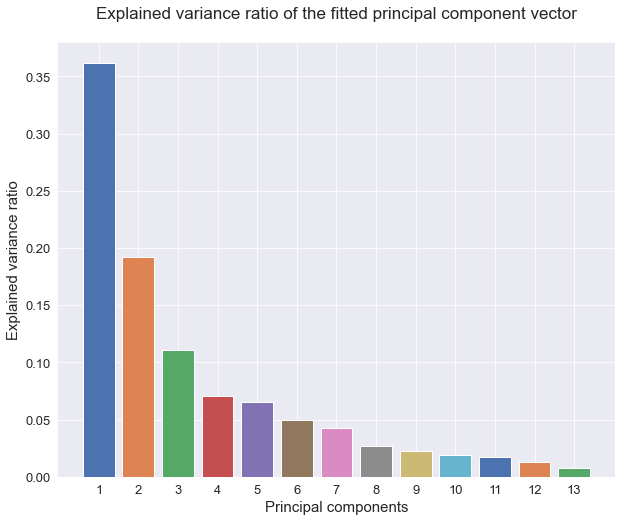

In [27]:
plt.figure(figsize=(10,8))
color = sns.color_palette('deep')
plt.bar(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
            height=X_pca.explained_variance_ratio_, color =color )

plt.grid(True)
plt.title("Explained variance ratio of the fitted principal component vector\n",fontsize=17)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))],fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the  1st  principal component explains about 36% of the total variance in the data and the 2nd  component explains further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance. PC1, PC2, PC3 retains the most of the pertinent information.

### Cumulative Explained Variance Plot

This is simply a plot that shows the trend of the cummulative explained variance per principal component.

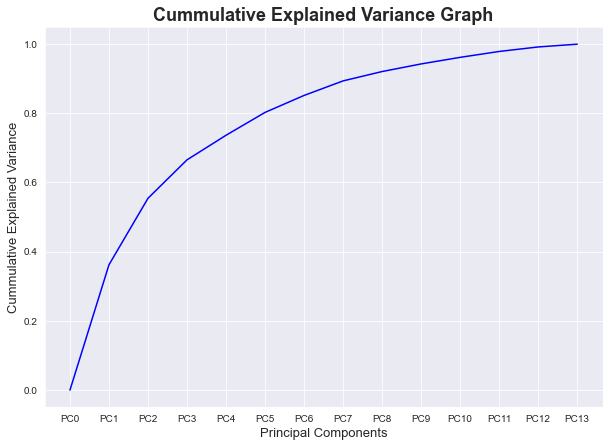

In [28]:
plt.figure(figsize=(10,7))
plt.plot(df_explained_variance['PC'],df_explained_variance['Cumulative Variance'], markersize=7, c='blue',lw=1.5)
plt.title('Cummulative Explained Variance Graph', fontsize=18, fontweight='bold')
plt.xlabel('Principal Components', fontsize=13)
plt.ylabel('Cummulative Explained Variance', fontsize=13)
plt.show();

### Transforming the scaled data set using the fitted PCA Object

In [29]:
X_trans = X_pca.transform(X)

In [30]:
labels = ['PC' + str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)]
X_trans = pd.DataFrame(data=X_trans, columns = labels)
X_trans.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


In [31]:
X_reff = pd.concat([X_trans, Y], axis=1)
pd.set_option('display.max_rows', X_reff.shape[0])
X_reff

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155,1
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778,1
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164,1
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084,1
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455,1


### Plotting the First PCA against the Second PCA on a ScatterPlot

We can plot the scatterplot to visualize the properties of each wine class in 2D, this would be done by utilizing the First and Second Principal Components, this would show us the clusters of each class.

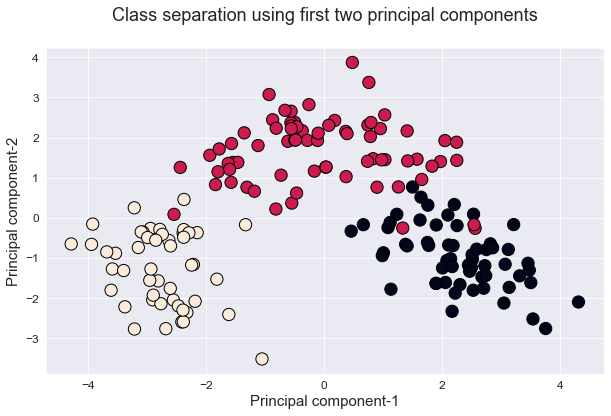

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X_trans['PC1'],X_trans['PC2'],c=wine['Class'],edgecolors='k',alpha=1,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=18)
plt.xlabel("Principal component-1",fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Principal component-2",fontsize=15)
plt.show();

## 3D Scatterplots showing Class seperation

We would simply visualize the wine class in 3D with <a href ='https://plotly.com/python/plotly-express/'>Plotly</a> for a more pellucid visualization of the wine classes, we would carry this out by use the first 3 principal components.

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_reff, x='PC1', y='PC2', z='PC3',
              color='Class')

fig.show()

We can clearly see how seperately clustered each wine class is from the plot above.

### Loading Scores

Loading score is term that provides information about the linear combination of each features that makes up a principal component, this gives an hint into which feature is more important to a principal component, it is analogous to linear regression in which each feature has its respective feature importance, in respect to determining the target variable, for example:

$$\begin{align}
Principal\space Component 1\space (PC1) = 0.556Alcohol\space +\space 0.344Malic Acid\space + \space 0.023Ash\space +.....
\end{align}$$

in the equation above, we can see that the Alcohol feature is the most important to the First Principal Component (PC1)

Now lets go ahead and retrieve the loading scores for our first and second principal components.

#### Retrieve the loadings values

In [ ]:
loadings = pca.components_.T
loadings


In [ ]:
df_loadings = pd.DataFrame(loadings, columns=labels, index=wine.columns[1:])
df_loadings

### Loading score for PC1

In [ ]:
df_loadings = pd.DataFrame(loadings, columns=labels, index=wine.columns[1:])
loaded_score_1 = df_loadings[['PC1']]
loaded_score_1.abs().sort_values('PC1', ascending=False)

From our table above, we can see that `Flavanoids`is the most important feature from $PC1$ and the least is `Ash` 

### Loading Score for PC2

In [ ]:
loaded_score_2 = df_loadings[['PC2']]
loaded_score_2.abs().sort_values('PC2', ascending=False)

For $PC2$ `Color Intensity` is the most important feature to the principal component, while `Nonflavanoid phenols` are the least important, this is completely different to PC1, which means that for each Principal components, the level of importance of each feature varies.

In [ ]:
loadings_label = df_loadings.index
# loadings_label = df_loadings.index.str.strip(' (cm)')

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()

Features such as `Magnesium`,`Alcohol`,`Total phenols` are more important to Class 1 wines, while `Alkalinity of ash`, `Ash`, `Mallic acid` and `Nonflavanoid phenols` are important to Class 3 wines and `Hue`, `OD280/OD315 of diluted wine` are important features for Class 2 wines.

## Further Reading

- Ibrahim Bashir 2021,Principal Component Analysis- https://ibrahimxbashir.medium.com/principle-component-analysis-5dd501640e28, Medium.


- Statquest 2018, Principal Component Analysis -https://www.youtube.com/watch?v=FgakZw6K1QQ&t=546s, Youtube.


- Data Professor 202O, Machine Learning in Python: Principal Component Analysis (PCA) for Handling High-Dimensional Data-https://www.youtube.com/watch?v=oiusrJ0btwA, Youtube.